# Import Libraries

In [144]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler


# Load dataset

In [145]:
datasets = pd.read_excel("/content/drive/MyDrive/DL course/Iris.xlsx", header=0)


In [146]:
datasets.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa


In [147]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    float64
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [148]:
datasets = datasets.drop("Id", axis=1)

In [149]:
datasets

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [150]:
datasets['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Prepare Training dataset

In [151]:
x_train = []
y_train = []

for i in range(0, len(datasets)):
    x_train.append([datasets.values[i, 0],
                    datasets.values[i, 1],
                    datasets.values[i, 2], 
                    datasets.values[i, 3]])
    
    if datasets.values[i, 4]=="Iris-setosa":
      y_train.append([0.0001])
    elif datasets.values[i, 4]=="Iris-versicolor":
      y_train.append([0.3000])
    else:
      y_train.append([0.6999])
    

# Data Normalization

In [152]:

scaller = StandardScaler()
scaller.fit(x_train)
x_train_scaller = scaller.transform(x_train)
x_train_scaller.shape[1] #number of column

4

# Create a neural network

In [153]:
class CustomNeuralNetwork:
    
    def __init__(self, x, y, lr, epoch):
        np.random.seed(100)
        
        
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],6) #4 features to 6 hidden neuron
        self.weights2 = np.random.rand(6, 1)
        
        self.y = y
        self.output = np.zeros(self.y.shape)
        self.lr = lr
        self.epoch = epoch
        
        self.costInfo = []
        
    @staticmethod    
    def _sigmoid(x):
        return 1.0/ (1 + np.exp(-x))
    @staticmethod
    def _sigmoid_derivative(x): return x*(1-x)
    @staticmethod
    def cost(y_target, y_output):
        return 0.5*(np.sum(np.square(np.subtract(y_target, y_output))))
    
    
    def forward(self):
        #print(np.dot(self.input, self.weights1))
        self.layer1 = self._sigmoid(np.dot(self.input, self.weights1))
        self.output = self._sigmoid(np.dot(self.layer1, self.weights2))
        

    def backPro(self):
        derivative_weights2 = np.dot(self.layer1.T, ((self.y - self.output)* self._sigmoid_derivative(self.output)))
        derivative_weights1 = np.dot(self.input.T, (np.dot((self.y - self.output)* self._sigmoid_derivative(self.output), self.weights2.T)* self._sigmoid_derivative(self.layer1)))
        
        self.weights1 += derivative_weights1 * self.lr
        self.weights2 += derivative_weights2 * self.lr
        
    
    
    def trainDatasets(self):
        for i in range(self.epoch):
            self.forward()
            self.backPro()
            self.costInfo.append(self.cost(self.y, self.output))
            
            
    def predict(self, input_data):
        self.input = input_data
        self.forward()
        return self.output

# Train the model

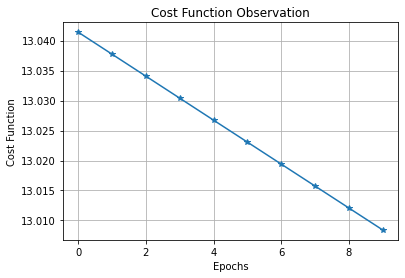

In [154]:
if __name__ == "__main__":
    nn = CustomNeuralNetwork(x = x_train_scaller, y = np.array(y_train), 
                            lr = 0.00003, epoch=10)
    nn.trainDatasets()
    
    
    epochsInfor = []
    for i in range(0, len(nn.costInfo)):
        epochsInfor.append(i)
        
    plt.plot(epochsInfor, nn.costInfo, marker = '*')
    plt.xlabel("Epochs")
    plt.ylabel("Cost Function")
    plt.title("Cost Function Observation")
    plt.grid()
    plt.show()

# Test the model

In [155]:
rng = np.random.default_rng(seed=0)
x_test= rng.random((10,4))
x_test


array([[0.63696169, 0.26978671, 0.04097352, 0.01652764],
       [0.81327024, 0.91275558, 0.60663578, 0.72949656],
       [0.54362499, 0.93507242, 0.81585355, 0.0027385 ],
       [0.85740428, 0.03358558, 0.72965545, 0.17565562],
       [0.86317892, 0.54146122, 0.29971189, 0.42268722],
       [0.02831967, 0.12428328, 0.67062441, 0.64718951],
       [0.61538511, 0.38367755, 0.99720994, 0.98083534],
       [0.68554198, 0.65045928, 0.68844673, 0.38892142],
       [0.13509651, 0.72148834, 0.52535432, 0.31024188],
       [0.48583536, 0.88948783, 0.93404352, 0.3577952 ]])

In [156]:
x_test_scalling = scaller.transform(x_test)
out = nn.predict(x_test_scalling)
  

classInformation =[]
for i in range(0, len(x_test_scalling)):
  if out[i] <= 0.3:
    classInformation.append("Iris-setosa")
  elif out[i]> 0.3 and out[i]<=0.8:
    classInformation.append("Iris-versicolor")
  else:
    classInformation.append("Iris-verginica")
  print("  ",out[i], "  ", classInformation[i])
#print("Output: ", out)
#print("Classinforation: {}".format(classInformation))

   [0.50024879]    Iris-versicolor
   [0.50088868]    Iris-versicolor
   [0.50057598]    Iris-versicolor
   [0.50025054]    Iris-versicolor
   [0.50043982]    Iris-versicolor
   [0.50030202]    Iris-versicolor
   [0.50056109]    Iris-versicolor
   [0.50050828]    Iris-versicolor
   [0.50046854]    Iris-versicolor
   [0.50068849]    Iris-versicolor
